### Linear Regression on Boston Housing Data

In [179]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import normalize

# For producing decision tree diagrams.
from IPython.core.display import Image, display


In [180]:
# load the boston housing data
boston = load_boston()
X, Y = boston.data, boston.target

# Shuffle the data, but make sure that the features and accompanying labels stay in sync.
np.random.seed(0)
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

# Split into train and test.
train_data, train_labels = X[:350], Y[:350]
test_data, test_labels = X[350:], Y[350:]

In [181]:
X.shape

(506, 13)

In [182]:
# Look over the attributes of the boston housing data object
print(dir(boston))
print()

# Investigate the DESCR attributes to see what each column represents
print(boston.DESCR)

['DESCR', 'data', 'feature_names', 'filename', 'target']

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full

In [183]:
# Create a pandas DF of each sample with features and target as the last column
df_boston = pd.DataFrame(X, columns=boston.feature_names)
df_boston['PRICE'] =  boston.target
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.06724,0.0,3.24,0.0,0.460,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34,24.0
1,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53,21.6
2,0.11425,0.0,13.89,1.0,0.550,6.373,92.4,3.3633,5.0,276.0,16.4,393.74,10.50,34.7
3,24.80170,0.0,18.10,0.0,0.693,5.349,96.0,1.7028,24.0,666.0,20.2,396.90,19.77,33.4
4,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.28392,0.0,7.38,0.0,0.493,5.708,74.3,4.7211,5.0,287.0,19.6,391.13,11.74,22.4
502,0.08664,45.0,3.44,0.0,0.437,7.178,26.3,6.4798,5.0,398.0,15.2,390.49,2.87,20.6
503,0.15098,0.0,10.01,0.0,0.547,6.021,82.6,2.7474,6.0,432.0,17.8,394.51,10.30,23.9
504,0.22927,0.0,6.91,0.0,0.448,6.030,85.5,5.6894,3.0,233.0,17.9,392.74,18.80,22.0


In [184]:
# Create another dataframe with just the target
df_target = pd.DataFrame(boston.target, columns=['PRICE'])
df_target

,PRICE
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


### Scatter Matrix

We can use a scatter matrix plot to see the scatter plot of each feature/target pair. This will give us a sense of their joint distribution/correlation with one another, as well as which features may be correlated with change in price.

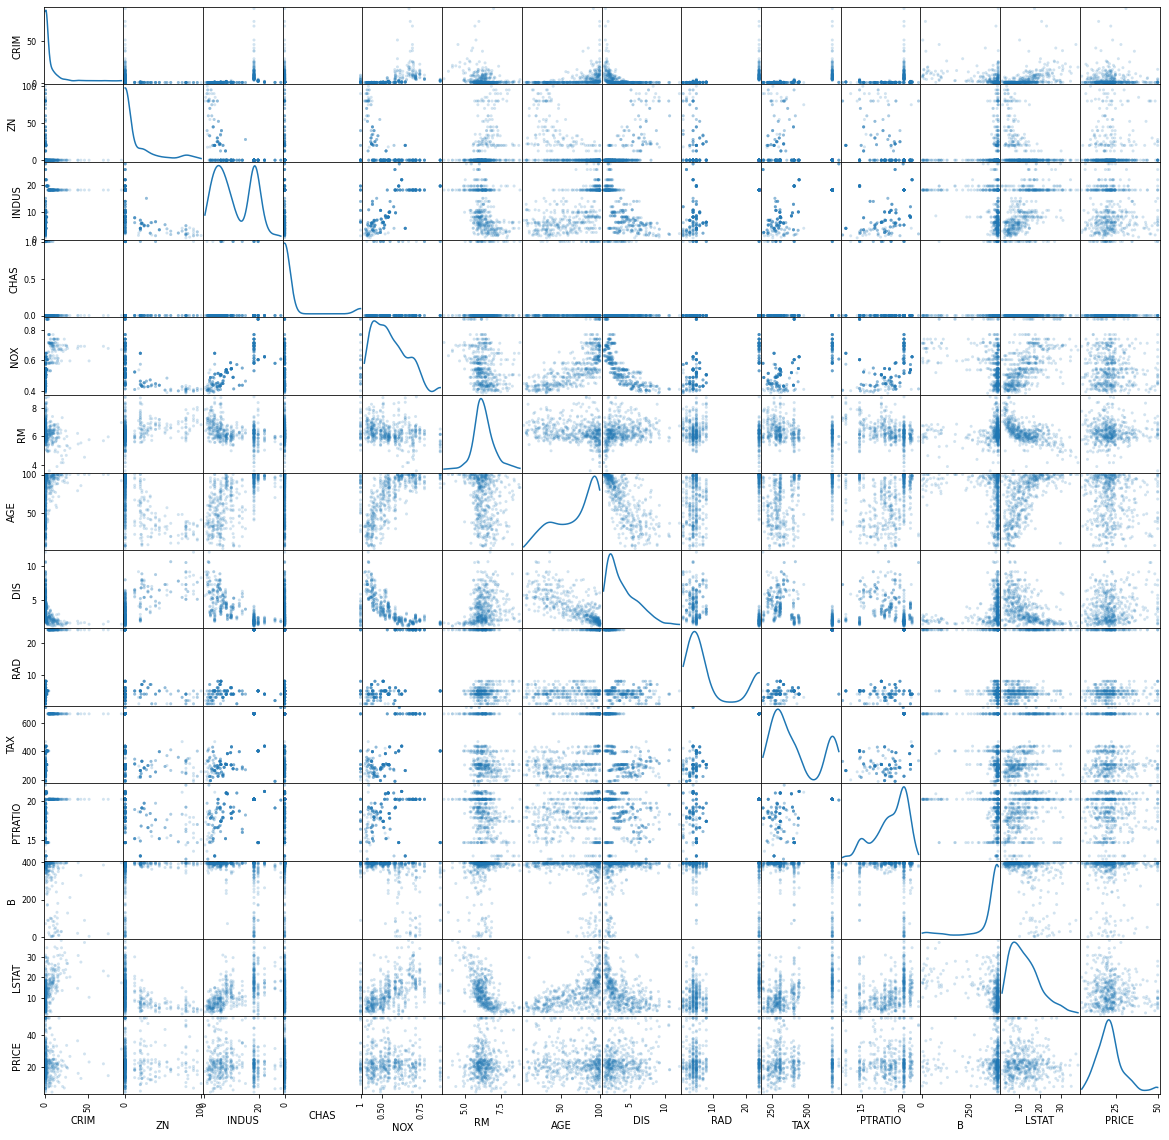

In [185]:
# Plot scatter matrix
scatter_matrix(df_boston, alpha=0.2, figsize=(20, 20), diagonal='kde')
pass

### Plot the scatter matrix again with normalized features

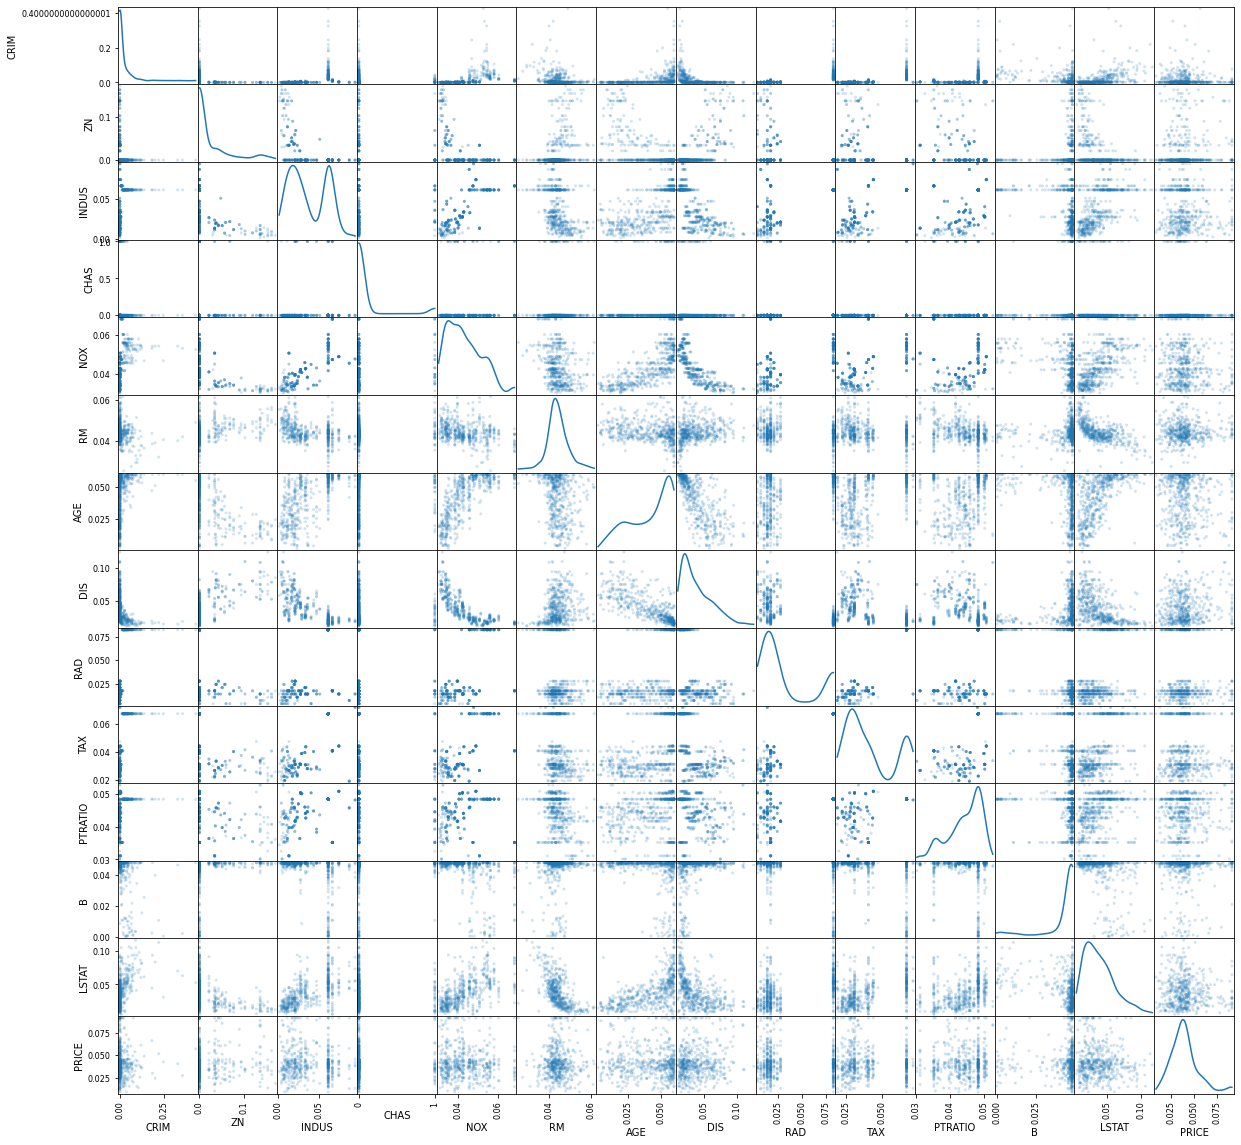

In [186]:
# Plot the scatter matrix but normalize some features first

first_half = pd.DataFrame(normalize(df_boston.iloc[:,:3], axis=0), columns = boston.feature_names[:3])
charles = df_boston.iloc[:,3]
second_half = pd.DataFrame(normalize(df_boston.iloc[:,4:], axis=0), columns = [*boston.feature_names[4:], 'PRICE'])

df_boston_norm = pd.concat([first_half, charles, second_half], axis=1)
scatter_matrix(df_boston_norm, alpha=0.2, figsize=(20, 20), diagonal='kde')
pass

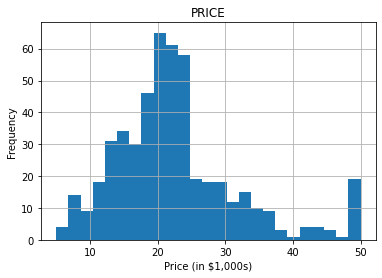

In [187]:
# Check out the distribution of prices using a histogram
df_target.hist(bins=25)
plt.xlabel("Price (in $1,000s)")
plt.ylabel("Frequency")
plt.show()

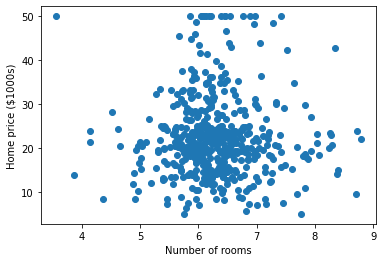

In [188]:
# Plot number of rooms with home price
plt.scatter(df_boston.RM, df_boston.PRICE)
plt.xlabel("Number of rooms")
plt.ylabel("Home price ($1000s)")
plt.show()

### Run the linear regression model

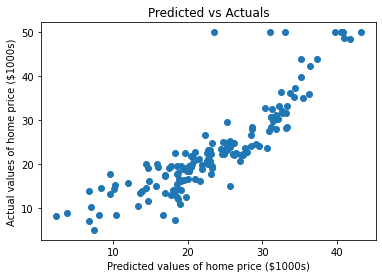

In [189]:
# Build the linear regresson model
lr_model = LinearRegression()
lr_model.fit(train_data, train_labels)
predicted_test_values = lr_model.predict(test_data)

plt.scatter(predicted_test_values, test_labels)
plt.title("Predicted vs Actuals")
plt.xlabel("Predicted values of home price ($1000s)")
plt.ylabel("Actual values of home price ($1000s)")
plt.show()

In [190]:
# Calculate the R^2 value of the model
print("R\u00B2:", lr_model.score(test_data, test_labels))

R²: 0.7518083416402185


### Run another regression model using custom cost_function and gradient_descent

In [191]:
# Define a cost function
def cost_function(X, y, theta):
    
    # Find the hypothesis function via cross product of X and theta tranposed
    hypothesis = np.matmul(X, theta)
    
    # Find the squared residuals by subtracting actual from predicted and squaring the difference
    sq_residuals = np.power(hypothesis - y, 2)
    
    # Return the sum of the squared residuals divided by 2m
    return np.sum(sq_residuals) / (2*len(y))


# Define the gradient descent function
def gradient_descent(X, y, theta, alpha, iterations):
        
    for i in range(iterations):  
                
        # Find the hypothesis function via cross product of X and theta tranposed
        hypothesis = np.matmul(X, theta)
        
        # Calculate the value of the derivative of the cost function
        cost_derivative = np.sum((hypothesis-y)*X, axis=0)
        
        # Simultaneously update the theta parameter vector
        theta = theta - ((alpha/len(y))*cost_derivative).reshape(-1,1)
    
    return theta

In [249]:
# Add a column of ones to X as X_0
X_norm = normalize(np.delete(X,3,1), axis=0)
X_col = np.hstack((np.ones((X_norm.shape[0], 1)), X_norm))

# Change y into a column vector
y_col = Y.reshape(-1,1)
y_col = normalize(y_col, axis=0)

# Initiliaze the parameter vector
theta = np.zeros((1,X_col.shape[1]))

# Set the number of iterations and alpha learning rate for GD
iters = 1000000
alpha = 0.001

In [250]:
X_col.shape

(506, 13)

In [251]:
cost_function(X_col, y_col, theta.T)

0.000988142292490119

In [252]:
final_theta = gradient_descent(X_col, y_col, theta.T, alpha, iters)
print(final_theta)

[[ 0.0520831 ]
 [-0.06474125]
 [ 0.06311479]
 [-0.06145447]
 [-0.01596899]
 [ 0.04390477]
 [-0.02300887]
 [-0.01386778]
 [-0.03471817]
 [-0.04090351]
 [-0.02434574]
 [ 0.02866092]
 [-0.14997435]]


In [253]:
cost_function(X_col, y_col, final_theta)

7.902998878916062e-05

In [254]:
predicted = np.matmul(X_col, final_theta)

In [255]:
predicted.shape

(506, 1)

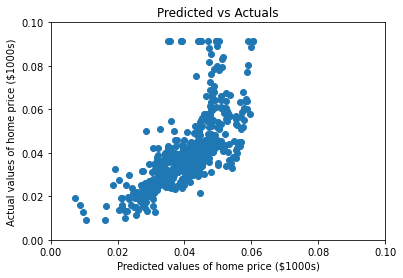

In [256]:
plt.scatter(predicted, y_col)
plt.title("Predicted vs Actuals")
plt.xlabel("Predicted values of home price ($1000s)")
plt.ylabel("Actual values of home price ($1000s)")
plt.xlim(0,0.1)
plt.ylim(0,0.1)
plt.show()